In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

C:\Users\NM TRADERS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dir(iris)


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:

df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df[df.target==0].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df.target==1].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
df[df.target==2].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [10]:

df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
73,6.1,2.8,4.7,1.2,1,versicolor
83,6.0,2.7,5.1,1.6,1,versicolor
126,6.2,2.8,4.8,1.8,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica
0,5.1,3.5,1.4,0.2,0,setosa


In [11]:
df['flower_name'].value_counts()


flower_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [12]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

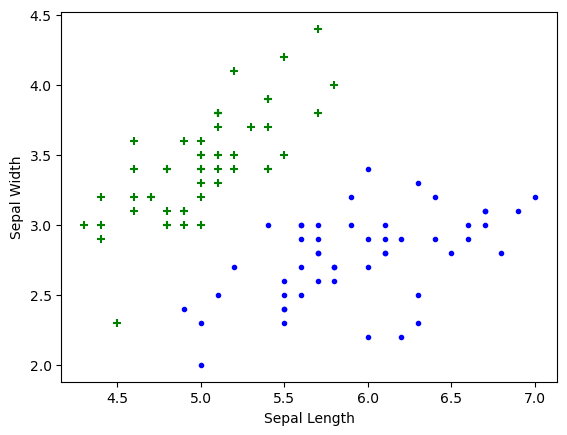

In [13]:
# Sepal length vs Sepal Width (Setosa vs Versicolor)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

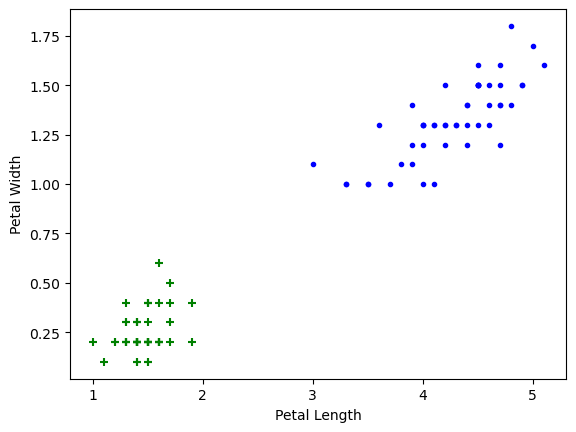

In [14]:
# Petal length vs Pepal Width (Setosa vs Versicolor)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')


In [15]:
# Train Using Support Vector Machine (SVM)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)


In [43]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


In [44]:
len(X_train)


120

In [45]:
len(X_test)


30

In [46]:
from sklearn.svm import SVC
model = SVC()

In [47]:
model.fit(X_train, y_train)


SVC()

In [48]:
y_test


38     0
66     1
115    2
117    2
89     1
136    2
68     1
94     1
84     1
28     0
90     1
11     0
40     0
126    2
79     1
144    2
123    2
124    2
76     1
59     1
132    2
105    2
53     1
17     0
64     1
18     0
13     0
116    2
9      0
81     1
Name: target, dtype: int32

In [49]:
y_pred = model.predict(X_test)


In [50]:
y_pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [51]:
model.score(X_test, y_test)


1.0

In [52]:
model.predict([[1.8,1.1,9.9,1.8]])


C:\Users\NM TRADERS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

In [53]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



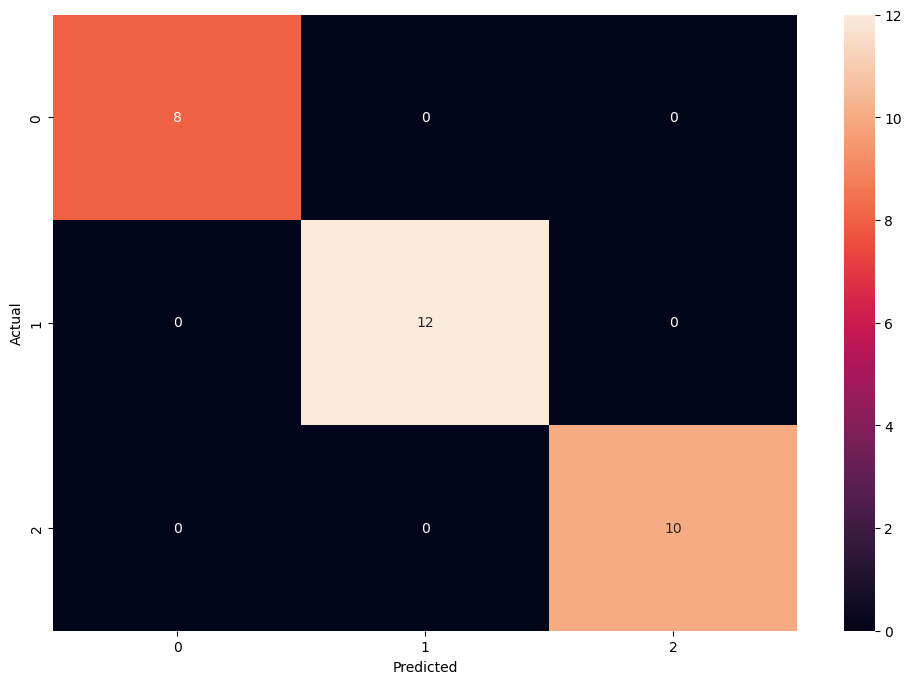

In [60]:
# draw the confusion matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [61]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)


1.0

In [71]:

model_C = SVC(C=140)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [72]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9333333333333333

In [73]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [74]:
model_linear_kernal.score(X_test, y_test)


1.0